# Part 1 Programming

In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import json
from joblib import Parallel, delayed
import numpy as np
from sklearn.metrics import silhouette_score
import unittest

In [122]:
# Load the data
data = pd.read_csv("dublinbike-historical-data-2024-01.csv")
# Print the 5 rows
data.head()

,STATION ID,TIME,LAST UPDATED,NAME,BIKE_STANDS,AVAILABLE_BIKE_STANDS,AVAILABLE_BIKES,STATUS,ADDRESS,LATITUDE,LONGITUDE
0,1,2024-01-01 00:00:02,2023-12-31 23:59:40,CLARENDON ROW,31,8,23,OPEN,Clarendon Row,53.3409,-6.26250
1,2,2024-01-01 00:00:02,2023-12-31 23:57:55,BLESSINGTON STREET,20,18,2,OPEN,Blessington Street,53.3568,-6.26814
2,3,2024-01-01 00:00:02,2023-12-31 23:59:33,BOLTON STREET,20,18,2,OPEN,Bolton Street,53.3512,-6.26986
3,4,2024-01-01 00:00:02,2023-12-31 23:49:57,GREEK STREET,20,10,10,OPEN,Greek Street,53.3469,-6.27298
4,5,2024-01-01 00:00:02,2023-12-31 23:51:04,CHARLEMONT PLACE,40,8,32,OPEN,Charlemont Street,53.3307,-6.26018


# Exploratory Data Analysis (EDA)

In [123]:
# dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169062 entries, 0 to 169061
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   STATION ID             169062 non-null  int64  
 1   TIME                   169062 non-null  object 
 2   LAST UPDATED           169062 non-null  object 
 3   NAME                   169062 non-null  object 
 4   BIKE_STANDS            169062 non-null  int64  
 5   AVAILABLE_BIKE_STANDS  169062 non-null  int64  
 6   AVAILABLE_BIKES        169062 non-null  int64  
 7   STATUS                 169062 non-null  object 
 8   ADDRESS                169062 non-null  object 
 9   LATITUDE               169062 non-null  float64
 10  LONGITUDE              169062 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 14.2+ MB


Missing values:
 STATION ID               0
TIME                     0
LAST UPDATED             0
NAME                     0
BIKE_STANDS              0
AVAILABLE_BIKE_STANDS    0
AVAILABLE_BIKES          0
STATUS                   0
ADDRESS                  0
LATITUDE                 0
LONGITUDE                0
dtype: int64


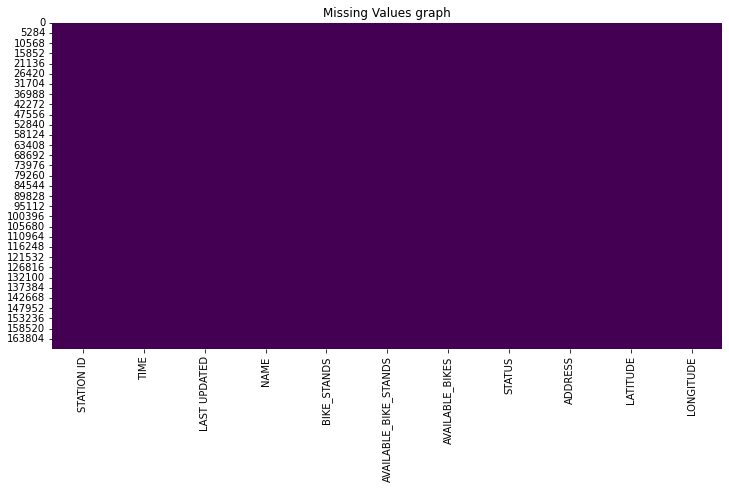

In [124]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing values:\n", missing_values)
# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values graph')
plt.show()

In [125]:
# statistical analysis
stats = data.describe()
print("statistical analysis:\n",stats)

statistical analysis:
           STATION ID    BIKE_STANDS  AVAILABLE_BIKE_STANDS  AVAILABLE_BIKES  \
count  169062.000000  169062.000000          169062.000000    169062.000000   
mean       58.824561      31.982456              19.990678        11.834919   
std        34.115551       7.457483              11.175331         9.809934   
min         1.000000      16.000000               0.000000         0.000000   
25%        29.000000      29.000000              11.000000         3.000000   
50%        58.500000      30.000000              20.000000        10.000000   
75%        89.000000      40.000000              29.000000        18.000000   
max       117.000000      40.000000              40.000000        40.000000   

            LATITUDE      LONGITUDE  
count  169062.000000  169062.000000  
mean       53.345561      -6.264373  
std         0.007573       0.017901  
min        53.330100      -6.310020  
25%        53.339800      -6.275230  
50%        53.344900      -6.263105  

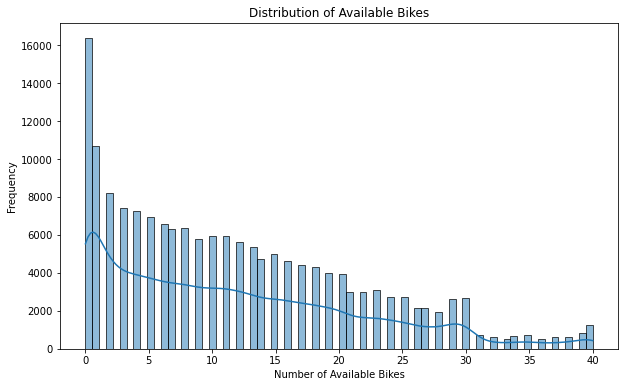

In [126]:
plt.figure(figsize=(10, 6))
sns.histplot(data['AVAILABLE_BIKES'], kde=True)
plt.title('Distribution of Available Bikes')
plt.xlabel('Number of Available Bikes')
plt.ylabel('Frequency')
plt.show()

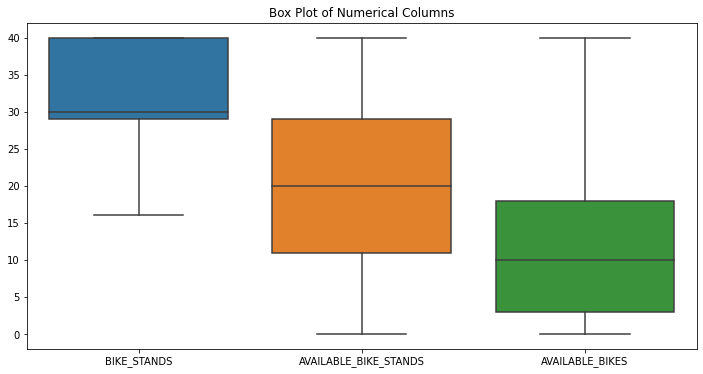

In [127]:
# check outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=data[['BIKE_STANDS', 'AVAILABLE_BIKE_STANDS', 'AVAILABLE_BIKES']])
plt.title('Box Plot of Numerical Columns')
plt.show()


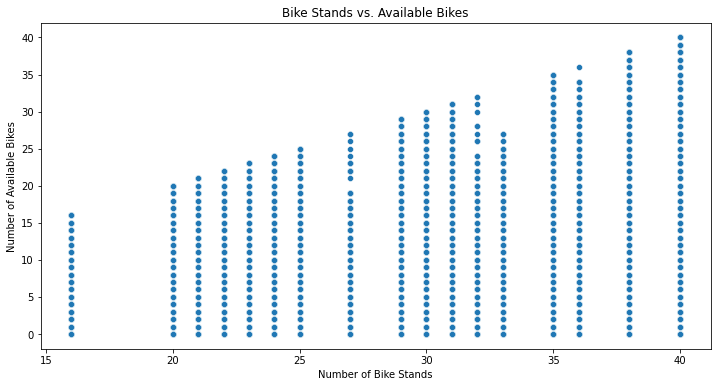

In [128]:
# Scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='BIKE_STANDS', y='AVAILABLE_BIKES', data=data, palette='viridis')
plt.title('Bike Stands vs. Available Bikes')
plt.xlabel('Number of Bike Stands')
plt.ylabel('Number of Available Bikes')
plt.show()

In [129]:
# Fill missing values
data.fillna(method='ffill', inplace=True)
# Remove duplicates
data.drop_duplicates(inplace=True)

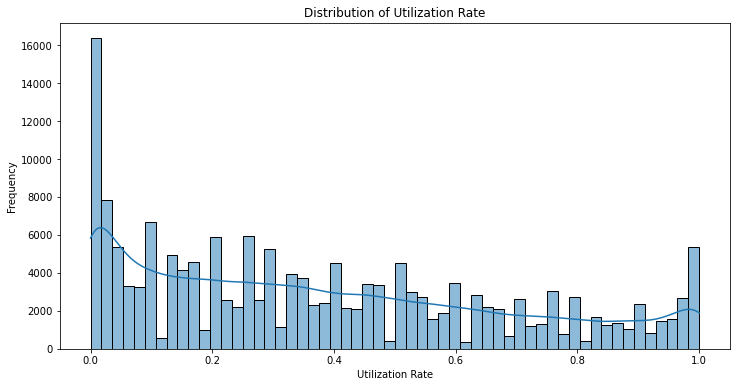

In [130]:
# Feature engineering
data['UTILIZATION_RATE'] = data['AVAILABLE_BIKES'] / data['BIKE_STANDS']
# Plot distribution
plt.figure(figsize=(12, 6))
sns.histplot(data['UTILIZATION_RATE'], kde=True, palette='viridis')
plt.title('Distribution of Utilization Rate')
plt.xlabel('Utilization Rate')
plt.ylabel('Frequency')
plt.show()


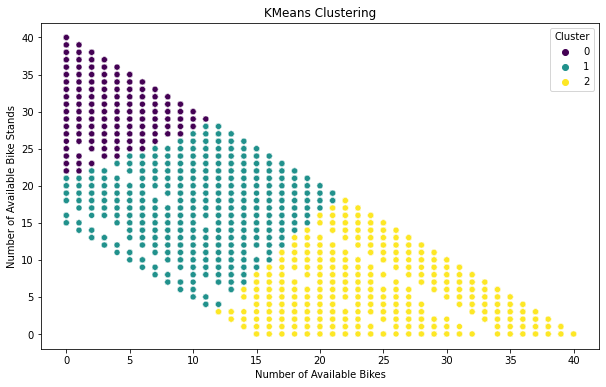

In [131]:
# input for model
X = data[['AVAILABLE_BIKES', 'AVAILABLE_BIKE_STANDS']]
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Apply KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
# Add column
data['Cluster'] = kmeans.labels_
# clusters visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AVAILABLE_BIKES', y='AVAILABLE_BIKE_STANDS', hue='Cluster', data=data, palette='viridis')
plt.title('KMeans Clustering')
plt.xlabel('Number of Available Bikes')
plt.ylabel('Number of Available Bike Stands')
plt.show()


In [132]:
# Preprocessing Function
def preprocess_data(data):
    data.fillna(method='ffill', inplace=True)
    data.drop_duplicates(inplace=True)
    data['TIME'] = pd.to_datetime(data['TIME'])
    data['LAST UPDATED'] = pd.to_datetime(data['LAST UPDATED'])
    return data

# function call
pre_data = preprocess_data(data)


# Part 2 Data From Diverse Sources

In [133]:
# Load Citi Bike data
citi_bike_data = pd.read_csv("JC-201909-citibike-tripdata.csv")
# Convert CSV to JSON
citi_bike_data.to_json("citibike-tripdata.json", orient='records', lines=True)

In [134]:
# Load Citi Bike data
citi_bike_json_data = pd.read_json("citibike-tripdata.json", lines=True)
citi_bike_json_data.head()
citi_bike_json_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49244 entries, 0 to 49243
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tripduration             49244 non-null  int64  
 1   starttime                49244 non-null  object 
 2   stoptime                 49244 non-null  object 
 3   start station id         49244 non-null  int64  
 4   start station name       49244 non-null  object 
 5   start station latitude   49244 non-null  float64
 6   start station longitude  49244 non-null  float64
 7   end station id           49244 non-null  int64  
 8   end station name         49244 non-null  object 
 9   end station latitude     49244 non-null  float64
 10  end station longitude    49244 non-null  float64
 11  bikeid                   49244 non-null  int64  
 12  usertype                 49244 non-null  object 
 13  birth year               49244 non-null  int64  
 14  gender                

In [135]:
# Check missing values
citi_bike_json_data.isnull().sum()
# Fill missing values
citi_bike_json_data.fillna(method='ffill', inplace=True)

In [136]:
# Convert datatype
citi_bike_json_data['starttime'] = pd.to_datetime(citi_bike_json_data['starttime'])
citi_bike_json_data['stoptime'] = pd.to_datetime(citi_bike_json_data['stoptime'])

In [137]:
# Feature engineering
citi_bike_json_data['tripduration_minutes'] = citi_bike_json_data['tripduration'] / 60

In [138]:
# aggregate data by start station ID
grouped_citi_bike_json_data = citi_bike_json_data.groupby('start station id').agg({
    'tripduration_minutes': 'mean',
    'bikeid': 'count'
}).reset_index()

In [139]:
# Load the Dublinbikes data
dublinbikes_data = pd.read_csv("dublinbike-historical-data-2024-01.csv")
dublinbikes_data.head()
dublinbikes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169062 entries, 0 to 169061
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   STATION ID             169062 non-null  int64  
 1   TIME                   169062 non-null  object 
 2   LAST UPDATED           169062 non-null  object 
 3   NAME                   169062 non-null  object 
 4   BIKE_STANDS            169062 non-null  int64  
 5   AVAILABLE_BIKE_STANDS  169062 non-null  int64  
 6   AVAILABLE_BIKES        169062 non-null  int64  
 7   STATUS                 169062 non-null  object 
 8   ADDRESS                169062 non-null  object 
 9   LATITUDE               169062 non-null  float64
 10  LONGITUDE              169062 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 14.2+ MB


In [140]:
# Check missing values
dublinbikes_data.isnull().sum()
# Fill missing values
dublinbikes_data.fillna(method='ffill', inplace=True)

In [141]:
# Convert Datatype
dublinbikes_data['TIME'] = pd.to_datetime(dublinbikes_data['TIME'])
dublinbikes_data['LAST UPDATED'] = pd.to_datetime(dublinbikes_data['LAST UPDATED'])

In [142]:
# Feature engineering
dublinbikes_data['UTILIZATION_RATE'] = dublinbikes_data['AVAILABLE_BIKES'] / dublinbikes_data['BIKE_STANDS']

In [143]:
# aggregate data by station ID
grouped_dublinbikes_data = dublinbikes_data.groupby('STATION ID').agg({
    'AVAILABLE_BIKES': 'mean',
    'AVAILABLE_BIKE_STANDS': 'mean'
}).reset_index()

In [144]:
# concatenation
concatenated_data = pd.concat([dublinbikes_data, citi_bike_data], ignore_index=True)
# merging datasets
merged_data = pd.merge(dublinbikes_data, citi_bike_json_data, left_on='STATION ID', right_on='start station id', how='inner')
# Resampling
resampled_data = dublinbikes_data.resample('D', on='TIME').mean().reset_index()

# Part 3 Data Manipulation

In [145]:
# Load the Dublinbikes data
dublinbikes_data = pd.read_csv("dublinbike-historical-data-2024-01.csv")
# Handle missing values
dublinbikes_data.fillna(method='ffill', inplace=True)
# Remove duplicates
dublinbikes_data.drop_duplicates(inplace=True)
# Convert datatypes
dublinbikes_data['TIME'] = pd.to_datetime(dublinbikes_data['TIME'])
dublinbikes_data['LAST UPDATED'] = pd.to_datetime(dublinbikes_data['LAST UPDATED'])

In [146]:
# Feature engineering
dublinbikes_data['UTILIZATION_RATE'] = dublinbikes_data['AVAILABLE_BIKES'] / dublinbikes_data['BIKE_STANDS']
# aggregate data by station ID
grouped_dublinbikes_data = dublinbikes_data.groupby('STATION ID').agg({
    'AVAILABLE_BIKES': 'mean',
    'AVAILABLE_BIKE_STANDS': 'mean',
    'UTILIZATION_RATE': 'mean'
}).reset_index()
print(grouped_dublinbikes_data.head())

   STATION ID  AVAILABLE_BIKES  AVAILABLE_BIKE_STANDS  UTILIZATION_RATE
0           1         9.997977              20.937964          0.322515
1           2         6.619690              13.374916          0.330984
2           3         9.797707              10.153742          0.489885
3           4         9.326365              10.660823          0.466318
4           5        24.697235              15.205664          0.617431


In [147]:
# Load the JSON data
citi_bike_json_data = pd.read_json("citibike-tripdata.json", lines=True)
# Handle missing values
citi_bike_json_data.fillna(method='ffill', inplace=True)
# Remove duplicates
citi_bike_json_data.drop_duplicates(inplace=True)
# Convert data types
citi_bike_json_data['starttime'] = pd.to_datetime(citi_bike_json_data['starttime'])
citi_bike_json_data['stoptime'] = pd.to_datetime(citi_bike_json_data['stoptime'])

In [148]:
# Feature engineering
citi_bike_json_data['tripduration_minutes'] = citi_bike_json_data['tripduration'] / 60
# aggregate data by start station ID
grouped_citi_bike_json_data = citi_bike_json_data.groupby('start station id').agg({
    'tripduration_minutes': 'mean',
    'bikeid': 'count'
}).reset_index()
print(grouped_citi_bike_json_data.head())

   start station id  tripduration_minutes  bikeid
0              3184             11.738268    1020
1              3185             12.508931    1226
2              3186              8.673224    5282
3              3187             23.630314    1297
4              3191             21.946601     152


## Merging on Common Key

In [149]:
# Merge datasets
merged_data = pd.merge(dublinbikes_data, citi_bike_json_data, left_on='STATION ID', right_on='start station id', how='inner', suffixes=('_dublin', '_citibike'))


# Part 4 Data Structures

In [150]:
# Load the data
dublinbikes_data = pd.read_csv("dublinbike-historical-data-2024-01.csv")
# Handle missing values
dublinbikes_data.fillna(method='ffill', inplace=True)
# Convert data types
dublinbikes_data['TIME'] = pd.to_datetime(dublinbikes_data['TIME'])
dublinbikes_data['LAST UPDATED'] = pd.to_datetime(dublinbikes_data['LAST UPDATED'])
# Feature engineering
dublinbikes_data['UTILIZATION_RATE'] = dublinbikes_data['AVAILABLE_BIKES'] / dublinbikes_data['BIKE_STANDS']
# Aggregation
grouped_data = dublinbikes_data.groupby('STATION ID').agg({
    'AVAILABLE_BIKES': 'mean',
    'AVAILABLE_BIKE_STANDS': 'mean'
}).reset_index()
grouped_data


,STATION ID,AVAILABLE_BIKES,AVAILABLE_BIKE_STANDS
0,1,9.997977,20.937964
1,2,6.619690,13.374916
2,3,9.797707,10.153742
3,4,9.326365,10.660823
4,5,24.697235,15.205664
...,...,...,...
109,113,4.919757,33.062711
110,114,10.805125,29.100472
111,115,20.565745,9.392448
112,116,2.664194,27.331760


In [151]:
# Load the JSON data
citi_bike_json_data = pd.read_json("citibike-tripdata.json", lines=True)
# Handle missing values
citi_bike_json_data.fillna(method='ffill', inplace=True)
# Convert data types
citi_bike_json_data['starttime'] = pd.to_datetime(citi_bike_json_data['starttime'])
citi_bike_json_data['stoptime'] = pd.to_datetime(citi_bike_json_data['stoptime'])
# Feature engineering
citi_bike_json_data['tripduration_minutes'] = citi_bike_json_data['tripduration'] / 60
# Aggregation
grouped_json_data = citi_bike_json_data.groupby('start station id').agg({
    'tripduration_minutes': 'mean',
    'bikeid': 'count'
}).reset_index()
grouped_json_data

,start station id,tripduration_minutes,bikeid
0,3184,11.738268,1020
1,3185,12.508931,1226
2,3186,8.673224,5282
3,3187,23.630314,1297
4,3191,21.946601,152
5,3192,27.737112,1116
6,3193,15.897818,382
7,3194,7.103642,929
8,3195,10.081857,2009
9,3196,16.376236,263


# Part 5 Testing Strategy

In [152]:
# load data
def load_data(file_path):
    return pd.read_csv(file_path)

In [153]:
#preprocess data
def preprocess_data(data):
    data.fillna(method='ffill', inplace=True)
    data.drop_duplicates(inplace=True)
    data['TIME'] = pd.to_datetime(data['TIME'])
    data['LAST UPDATED'] = pd.to_datetime(data['LAST UPDATED'])
    data['UTILIZATION_RATE'] = data['AVAILABLE_BIKES'] / data['BIKE_STANDS']
    return data

In [154]:
# perform clustering
def perform_clustering(data):
    X = data[['AVAILABLE_BIKES', 'AVAILABLE_BIKE_STANDS']]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    kmeans = KMeans(n_clusters=3, random_state=42)
    kmeans.fit(X_scaled)
    data['Cluster'] = kmeans.labels_
    return data

In [155]:
# Unit test
class TestDataProcessing(unittest.TestCase):
    def test_utilization_rate(self):
        self.assertEqual(calculate_utilization_rate(10, 20), 0.5)
        self.assertEqual(calculate_utilization_rate(0, 20), 0)
        self.assertEqual(calculate_utilization_rate(10, 0), 0)
        self.assertEqual(calculate_utilization_rate(0, 0), 0)

In [156]:
# integration test
class TestIntegration(unittest.TestCase):
    def test_data_pipeline(self):
        data = load_data("dublinbike-historical-data-2024-01.csv")
        cleaned_data = preprocess_data(data)
        clusters = perform_clustering(cleaned_data)
        self.assertEqual(len(clusters), len(cleaned_data))


In [157]:
def run_tests():
    suite = unittest.TestLoader().loadTestsFromTestCase(TestDataProcessing)
    unittest.TextTestRunner().run(suite)
def run_integration_tests():
    suite = unittest.TestLoader().loadTestsFromTestCase(TestIntegration)
    unittest.TextTestRunner().run(suite)
run_tests()
run_integration_tests()

.
----------------------------------------------------------------------
Ran 1 test in 0.001s

OK
.
----------------------------------------------------------------------
Ran 1 test in 1.723s

OK


# Part 6 Optimization Strategy

In [158]:
# Load Data
def load_data_in_chunks(file_path, chunk_size=100000):
    chunks = []
    for chunk in pd.read_csv(file_path, chunksize=chunk_size):
        chunks.append(chunk)
    return pd.concat(chunks, ignore_index=True)

dublinbikes_data = load_data_in_chunks("dublinbike-historical-data-2024-01.csv")

In [159]:
# feature engineering
dublinbikes_data['UTILIZATION_RATE'] = dublinbikes_data['AVAILABLE_BIKES'] / dublinbikes_data['BIKE_STANDS']


In [160]:
# Convert datatypers
dublinbikes_data['STATION ID'] = dublinbikes_data['STATION ID'].astype('int32')
dublinbikes_data['BIKE_STANDS'] = dublinbikes_data['BIKE_STANDS'].astype('int16')

In [161]:
# remove duplicate and fill missing values
dublinbikes_data.drop_duplicates(inplace=True)
dublinbikes_data.fillna(method='ffill', inplace=True)

In [162]:
def train_kmeans(data, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, algorithm='elkan')
    kmeans.fit(data)
    return kmeans.labels_

data_chunks = np.array_split(dublinbikes_data[['AVAILABLE_BIKES', 'AVAILABLE_BIKE_STANDS']], 4)
results = Parallel(n_jobs=-1)(delayed(train_kmeans)(chunk, 3) for chunk in data_chunks)

In [163]:
dublinbikes_data.to_hdf('dublinbikes_data.h5', key='df', mode='w')